# Data Understanding and Loading 

In [1]:
## importing all the libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Loading the dataset 
df = pd.read_csv("AtherRizta_datset_simulation.xls",index_col=0) 
df.index=range(1,len(df)+1)

In [3]:
df.head()

,Timestamp,Ride_Mode,Front_PSI,Rear_PSI,Motor_Current,Motor_Temp,Discharge_Current,Battery_Voltage,Voltage_Difference,Battery_Impedance,Battery_Temp,SOC,Speed,Regen_Triggered,Regen_Current,Acceleration,Incline_Angle
1,2025-01-01 00:00:00,Zip,22.133395,35.902564,26.432951,28.445774,27.754599,57.788324,9.595966,85.432865,28.000000,94.910725,73.165020,False,0.0,NaN,0.431881
2,2025-01-01 00:00:05,Smart Eco,22.061009,35.959559,25.000000,28.510015,26.250000,57.956127,14.467916,85.905841,28.376673,94.850122,37.837259,True,-15.0,-1.956169,-0.449068
3,2025-01-01 00:00:10,Smart Eco,22.153538,35.886316,16.113914,28.300610,16.919610,58.308272,18.920789,85.323649,28.226449,94.987229,41.856739,False,0.0,0.234243,0.317115
4,2025-01-01 00:00:15,Zip,22.183009,36.095582,30.384059,28.320259,31.903262,57.536257,NaN,85.184668,28.000000,94.736974,51.445691,False,0.0,0.636505,-0.509013
5,2025-01-01 00:00:20,Zip,22.133961,35.855153,33.589789,28.178581,35.269278,57.623037,15.284090,85.000000,28.015800,94.481268,64.713736,False,0.0,0.753803,-0.321698


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 1 to 18050
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           18050 non-null  object 
 1   Ride_Mode           18050 non-null  object 
 2   Front_PSI           17870 non-null  float64
 3   Rear_PSI            17870 non-null  float64
 4   Motor_Current       18050 non-null  float64
 5   Motor_Temp          18050 non-null  float64
 6   Discharge_Current   18050 non-null  float64
 7   Battery_Voltage     18050 non-null  float64
 8   Voltage_Difference  17870 non-null  float64
 9   Battery_Impedance   18050 non-null  float64
 10  Battery_Temp        18050 non-null  float64
 11  SOC                 18050 non-null  float64
 12  Speed               18050 non-null  float64
 13  Regen_Triggered     18050 non-null  bool   
 14  Regen_Current       18050 non-null  float64
 15  Acceleration        17959 non-null  float64
 16  Incl

In [5]:
df.describe()

,Front_PSI,Rear_PSI,Motor_Current,Motor_Temp,Discharge_Current,Battery_Voltage,Voltage_Difference,Battery_Impedance,Battery_Temp,SOC,Speed,Regen_Current,Acceleration,Incline_Angle
count,17870.000000,17870.000000,18050.000000,18050.000000,18050.000000,18050.000000,17870.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,17959.000000,17960.000000
mean,21.501655,35.102405,26.425201,78.864377,27.746461,57.967716,11.998437,85.574320,32.158994,22.032229,58.031406,-6.140495,-0.000821,-0.000117
std,0.361983,0.542697,9.026408,13.980481,9.477728,0.301149,2.952671,0.494030,0.534875,9.873732,14.853073,7.373805,1.166573,0.511762
min,20.611074,33.802697,5.000000,28.000000,5.250000,56.069150,5.000000,85.000000,28.000000,20.000000,4.441284,-15.000000,-3.000000,-2.103964
25%,21.197008,34.648429,19.575618,85.000000,20.554399,57.754652,9.971352,85.112330,31.801976,20.000000,46.962754,-15.000000,-0.825159,-0.343633
50%,21.503701,35.100158,25.654315,85.000000,26.937031,57.982424,11.980949,85.508888,32.152438,20.000000,56.899823,0.000000,-0.010887,-0.003071
75%,21.804260,35.553860,32.855374,85.000000,34.498142,58.187272,13.982513,85.919099,32.518705,20.000000,70.593913,0.000000,0.836622,0.332270
max,22.391233,36.419604,88.282671,85.000000,92.696805,58.800000,20.000000,87.659466,34.321075,95.000000,90.000000,0.000000,3.000000,4.107934


In [6]:
df["Ride_Mode"].value_counts() # Unique categorical_values 

Ride_Mode
Zip          12708
Smart Eco     5342
Name: count, dtype: int64

In [7]:
df[["Ride_Mode","Regen_Triggered"]].value_counts()

Ride_Mode  Regen_Triggered
Zip        False              8961
           True               3747
Smart Eco  True               3645
           False              1697
Name: count, dtype: int64

# 2. Data Preparation (Cleaning & Transformation)

## Handle Missing Values

In [8]:
df.isnull().sum()

Timestamp               0
Ride_Mode               0
Front_PSI             180
Rear_PSI              180
Motor_Current           0
Motor_Temp              0
Discharge_Current       0
Battery_Voltage         0
Voltage_Difference    180
Battery_Impedance       0
Battery_Temp            0
SOC                     0
Speed                   0
Regen_Triggered         0
Regen_Current           0
Acceleration           91
Incline_Angle          90
dtype: int64

<Axes: xlabel='Front_PSI', ylabel='Count'>

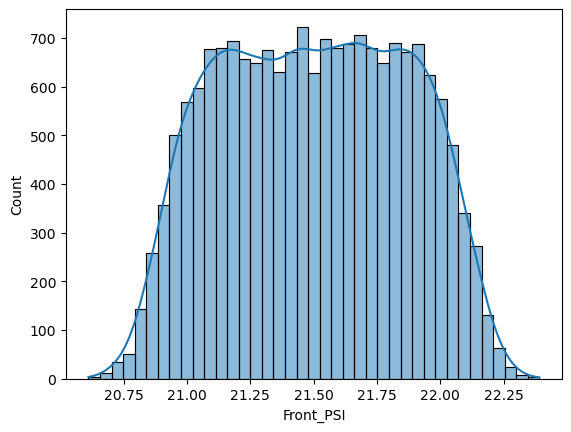

In [9]:
sns.histplot(df["Front_PSI"],kde=True)

In [10]:
## not skewed so handling the nulls with mean()
df["Front_PSI"]=df["Front_PSI"].fillna(df["Front_PSI"].mean().round())

In [11]:
df["Front_PSI"].isnull().sum()

np.int64(0)

<Axes: xlabel='Front_PSI', ylabel='Count'>

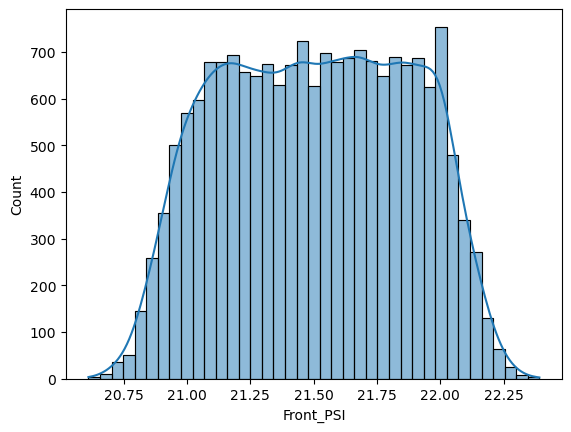

In [12]:
sns.histplot(df["Front_PSI"],kde=True)

In [13]:
null_cols=df.columns[df.isnull().any()]

In [14]:
null_cols= df[null_cols]

In [15]:
null_cols.head() ## handling them separately and later replaced in the main table

,Rear_PSI,Voltage_Difference,Acceleration,Incline_Angle
1,35.902564,9.595966,NaN,0.431881
2,35.959559,14.467916,-1.956169,-0.449068
3,35.886316,18.920789,0.234243,0.317115
4,36.095582,NaN,0.636505,-0.509013
5,35.855153,15.284090,0.753803,-0.321698


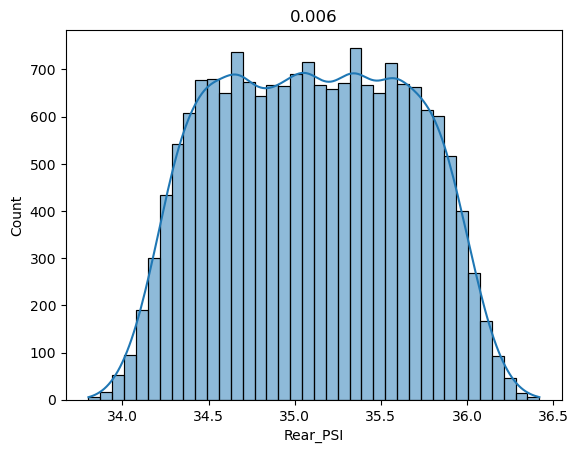

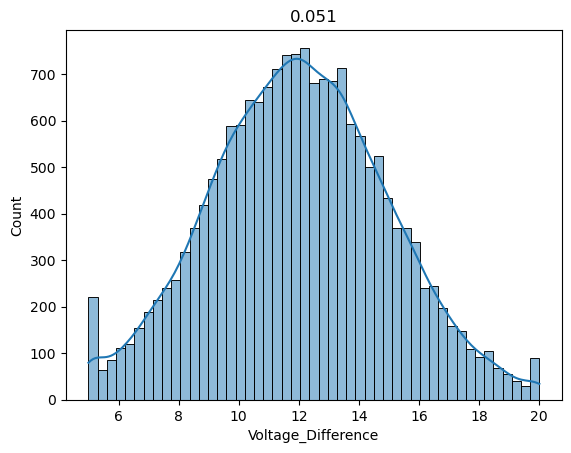

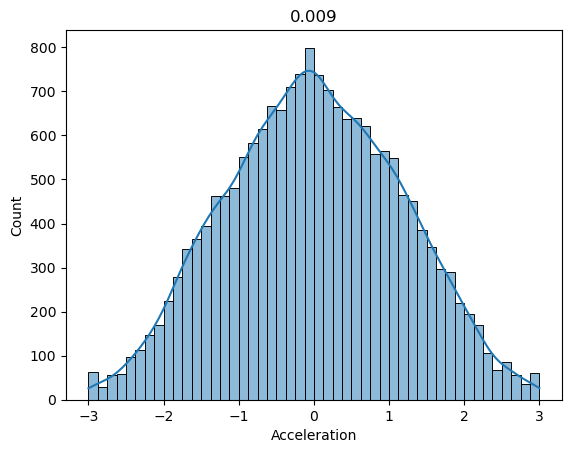

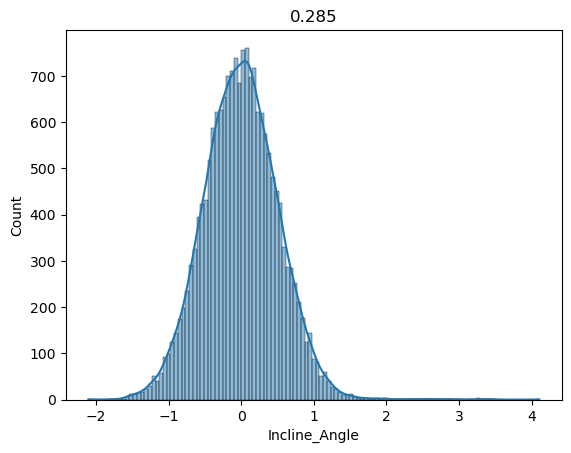

In [16]:
## Visualising the columns 
for col in null_cols:
    sns.histplot(null_cols[col],kde=True)
    plt.title(null_cols[col].skew().round(3))
    plt.show()

In [17]:
null_cols.columns

Index(['Rear_PSI', 'Voltage_Difference', 'Acceleration', 'Incline_Angle'], dtype='object')

In [18]:
for col in null_cols:
    if abs(null_cols[col].skew()) <= 0.5:
        null_cols[col]= null_cols[col].fillna(null_cols[col].mean().round(1))
    elif abs(null_cols[col].skew()) >= 0.5  and abs(null_cols[col]) <= 1:
        null_cols[col]= null_cols[col].fillna(null_cols[col].median().round(1))
        

C:\Users\hp\AppData\Local\Temp\ipykernel_8688\1998633949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cols[col]= null_cols[col].fillna(null_cols[col].mean().round(1))


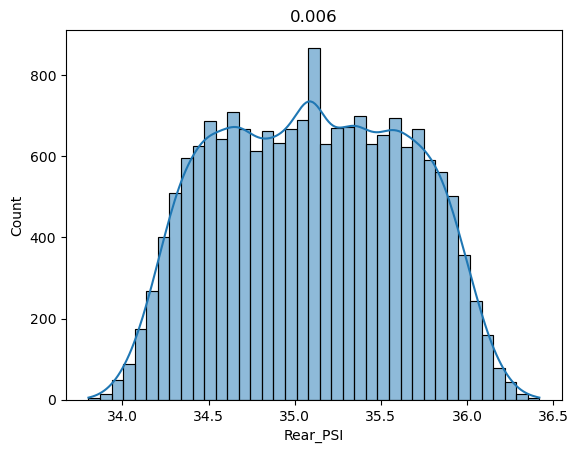

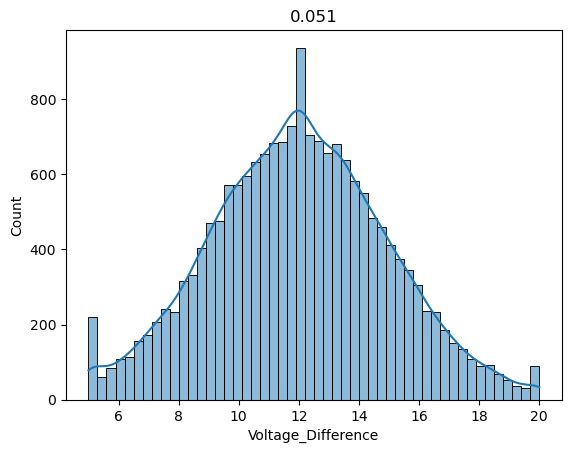

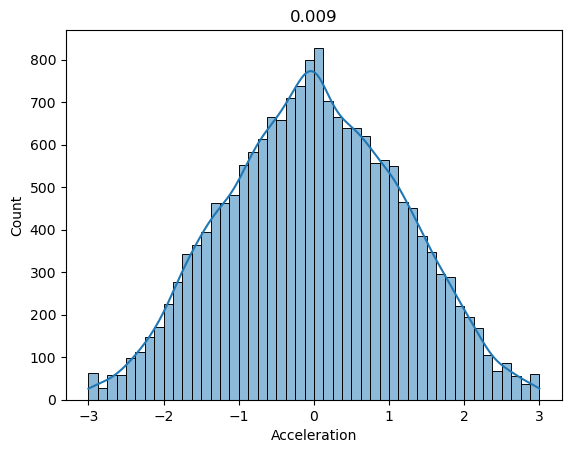

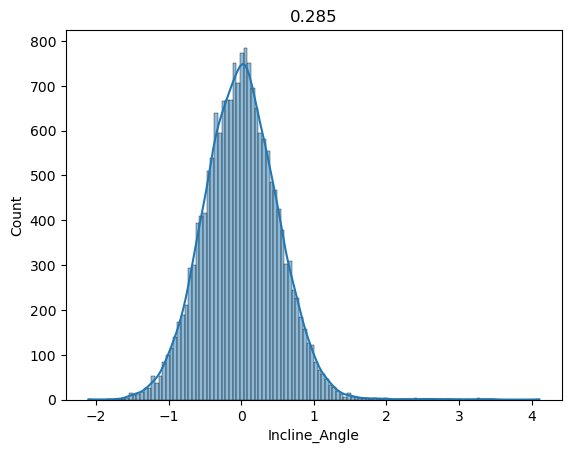

In [19]:
for col in null_cols:
    sns.histplot(null_cols[col],kde=True)
    plt.title(null_cols[col].skew().round(3))
    plt.show()

In [20]:
df[null_cols.columns]= null_cols

In [21]:
df.isnull().sum() # handled all the missing values

Timestamp             0
Ride_Mode             0
Front_PSI             0
Rear_PSI              0
Motor_Current         0
Motor_Temp            0
Discharge_Current     0
Battery_Voltage       0
Voltage_Difference    0
Battery_Impedance     0
Battery_Temp          0
SOC                   0
Speed                 0
Regen_Triggered       0
Regen_Current         0
Acceleration          0
Incline_Angle         0
dtype: int64

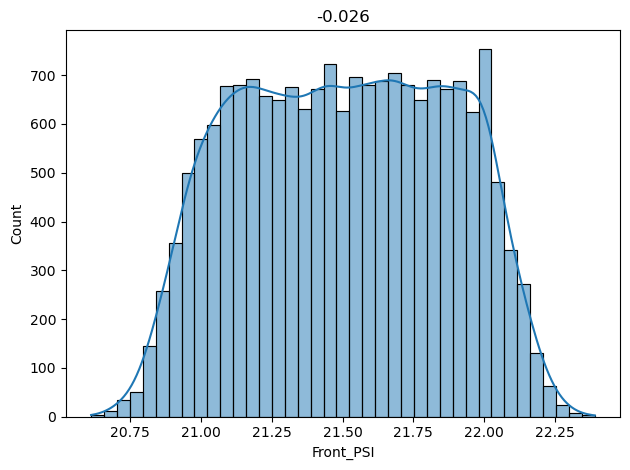

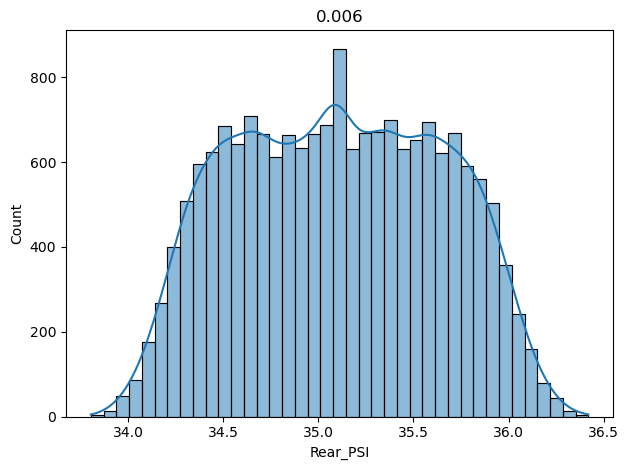

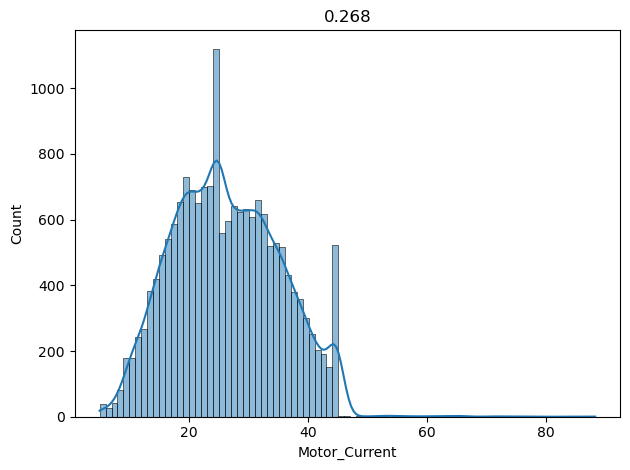

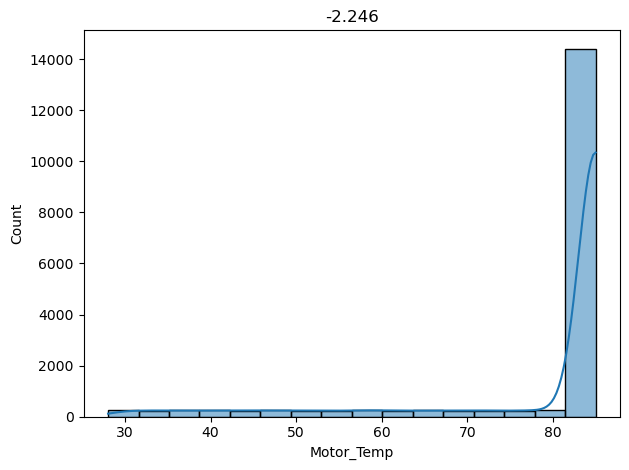

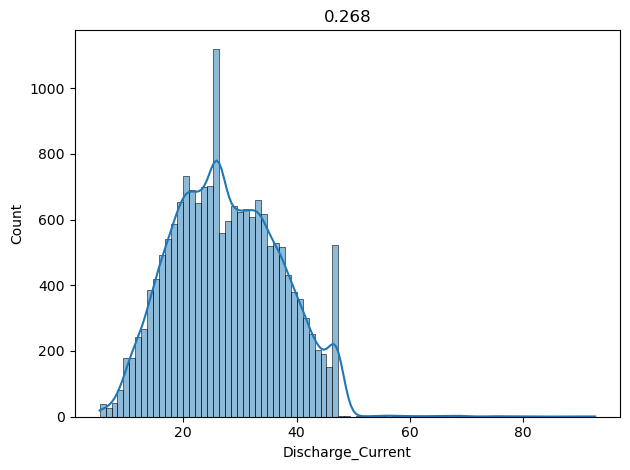

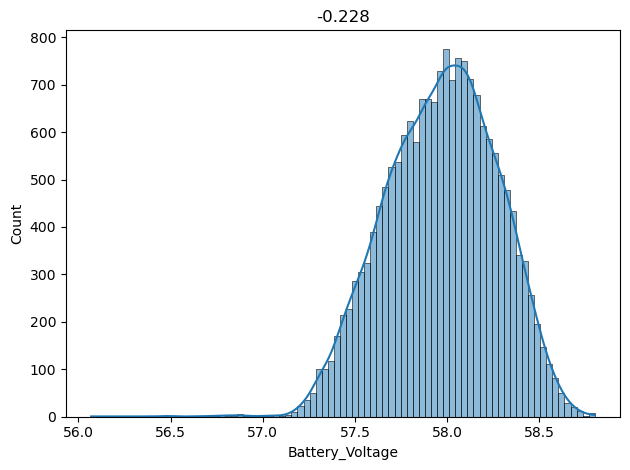

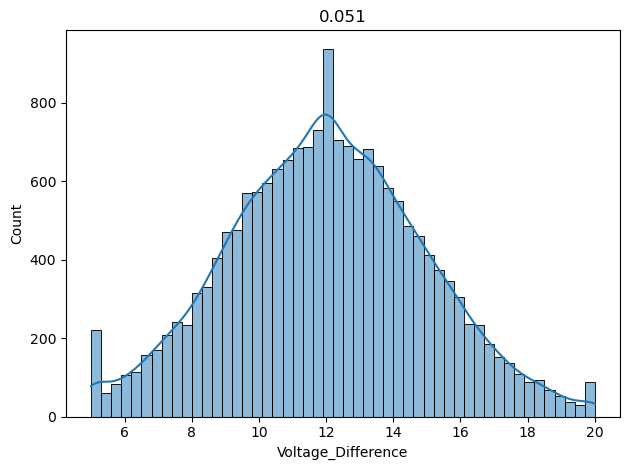

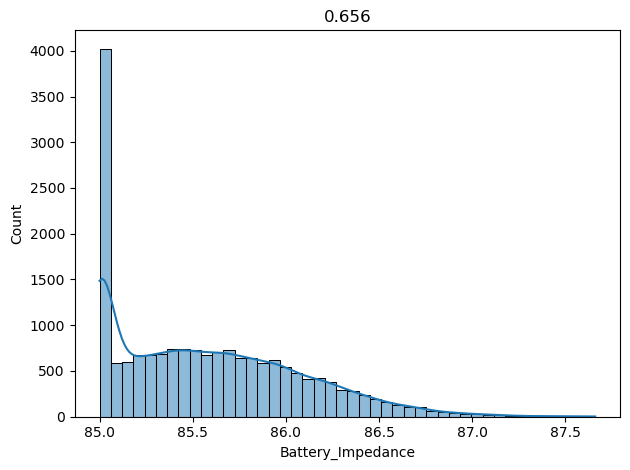

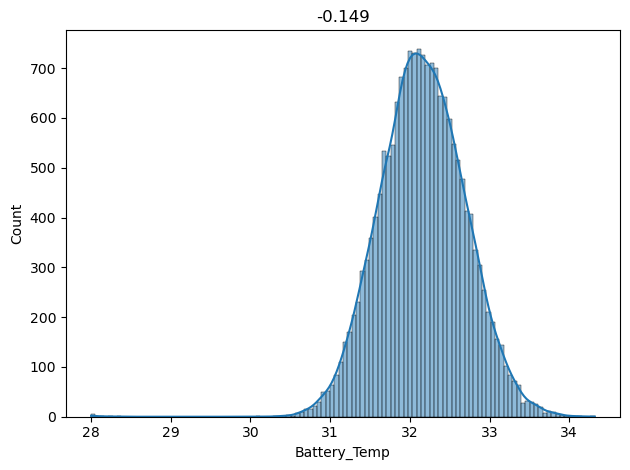

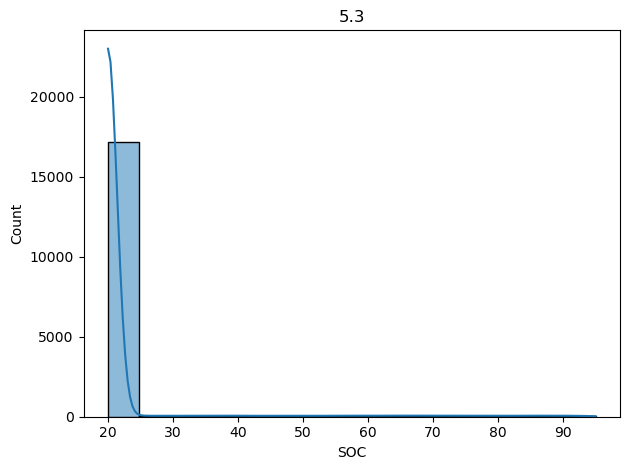

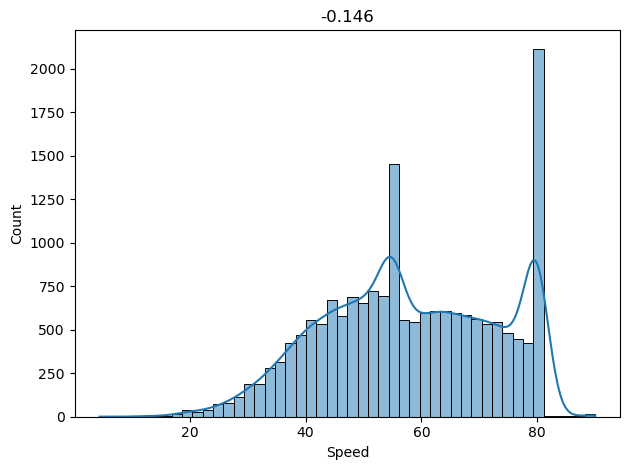

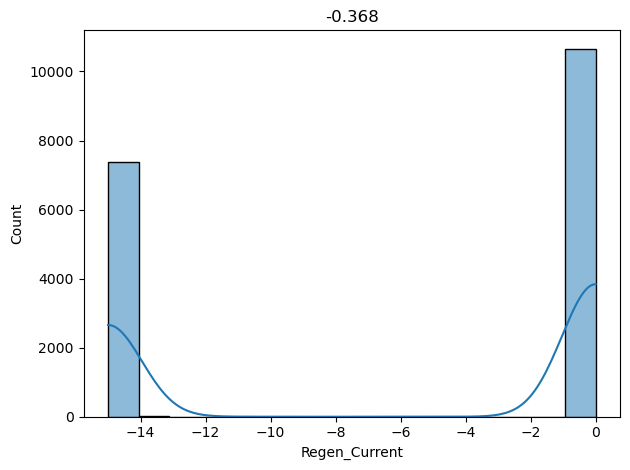

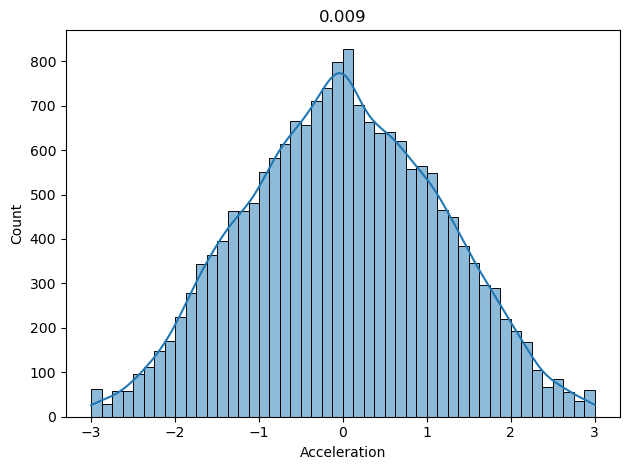

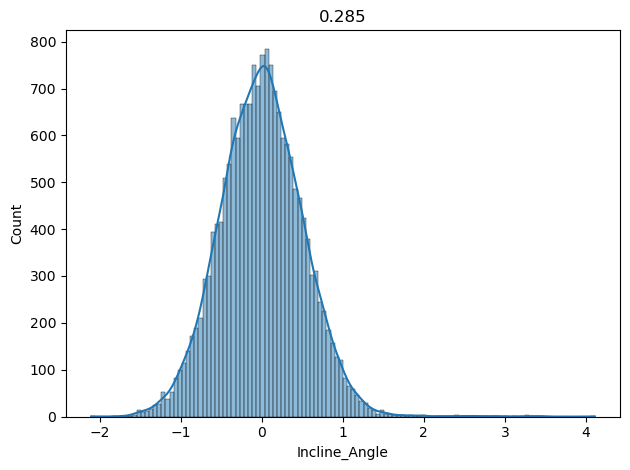

In [22]:
for col in df.select_dtypes(include="number").columns:
    sns.histplot(df[col],kde=True)
    plt.title(df[col].skew().round(3))
    plt.tight_layout()
    plt.show()

In [23]:
def df_skew(table):
    skews={}
    highly_skewed={}
    for col in table.select_dtypes(include="number").columns:
        skew_value=float(table[col].skew().round(2))
        skews[col]=skew_value
        if abs(skew_value)>1:
            highly_skewed[col] = skew_value
        
        
    return skews, highly_skewed

In [24]:
df_skew(df)

({'Front_PSI': -0.03,
  'Rear_PSI': 0.01,
  'Motor_Current': 0.27,
  'Motor_Temp': -2.25,
  'Discharge_Current': 0.27,
  'Battery_Voltage': -0.23,
  'Voltage_Difference': 0.05,
  'Battery_Impedance': 0.66,
  'Battery_Temp': -0.15,
  'SOC': 5.3,
  'Speed': -0.15,
  'Regen_Current': -0.37,
  'Acceleration': 0.01,
  'Incline_Angle': 0.29},
 {'Motor_Temp': -2.25, 'SOC': 5.3})

In [25]:
outlier_columns=df[["SOC","Motor_Temp"]]

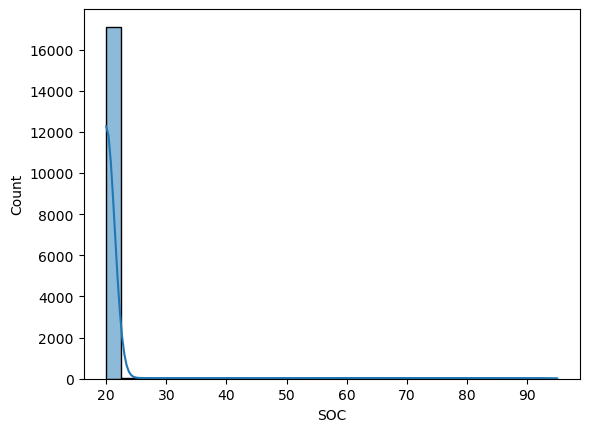

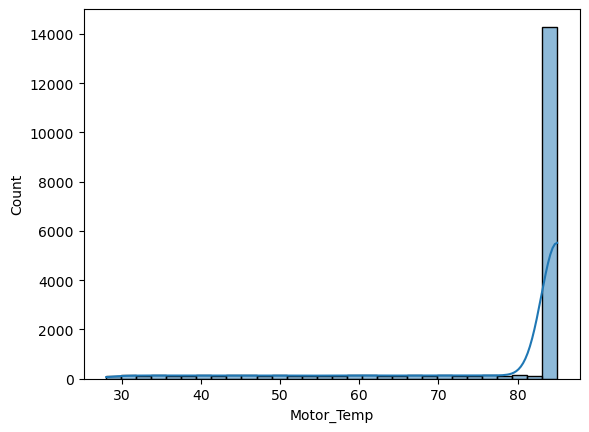

In [26]:
for col in outlier_columns:
    sns.histplot(outlier_columns[col],bins=30,kde=True)
    plt.show()

In [27]:
from scipy import stats
outlier_columns["SOC_boxcox"],_= stats.boxcox(outlier_columns["SOC"]+ 1e-6 )


C:\Users\hp\AppData\Local\Temp\ipykernel_8688\170366926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_columns["SOC_boxcox"],_= stats.boxcox(outlier_columns["SOC"]+ 1e-6 )


<Axes: ylabel='Count'>

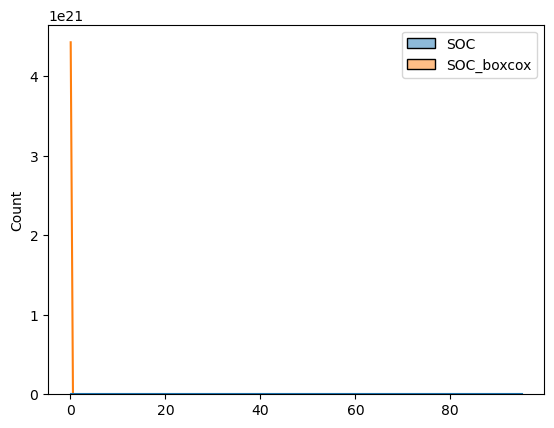

In [28]:
sns.histplot(data=outlier_columns[["SOC","SOC_boxcox"]],kde=True)

In [29]:
outlier_columns[["SOC"]].value_counts()

SOC      
20.000000    17077
20.210613        1
20.339307        1
20.460562        1
20.591704        1
             ...  
94.736974        1
94.850122        1
94.910725        1
94.987229        1
20.048339        1
Name: count, Length: 974, dtype: int64

# Dependent Columns
### The State of Charge (SOC) is closely linked with several other columns due to the physical and operational relationships in an electric scooter:

###  Battery_Voltage: SOC and voltage are directly related—as SOC drops, so does battery voltage, and vice versa.

###  Discharge_Current: Higher current draws deplete SOC faster.

###  Motor_Current: Motor current is a direct driver of discharge current (and thus SOC depletion).

###  Battery_Temp: Extreme temperatures can affect SOC measurement accuracy and battery efficiency.

###  Battery_Impedance: Higher impedance can cause voltage sag, affecting SOC estimation.

###  Speed, Acceleration, Incline_Angle: These influence current draw and thus SOC depletion rate.

###  Regen_Current: Regenerative braking can temporarily increase SOC (but this is usually a small effect in practice).

In [30]:
soc_dep=df[["SOC","Battery_Voltage","Discharge_Current","Motor_Current","Battery_Temp","Battery_Impedance","Regen_Current"]]

In [31]:
soc_dep

,SOC,Battery_Voltage,Discharge_Current,Motor_Current,Battery_Temp,Battery_Impedance,Regen_Current
1,94.910725,57.788324,27.754599,26.432951,28.000000,85.432865,0.0
2,94.850122,57.956127,26.250000,25.000000,28.376673,85.905841,-15.0
3,94.987229,58.308272,16.919610,16.113914,28.226449,85.323649,0.0
4,94.736974,57.536257,31.903262,30.384059,28.000000,85.184668,0.0
5,94.481268,57.623037,35.269278,33.589789,28.015800,85.000000,0.0
...,...,...,...,...,...,...,...
18046,20.000000,57.852065,29.344527,27.947168,32.403695,85.402396,-15.0
18047,20.000000,58.443100,20.019034,19.065747,31.772446,85.329815,0.0
18048,20.000000,57.798098,30.072822,28.640782,32.456002,85.590026,0.0
18049,20.000000,57.825481,34.598983,32.951412,32.376761,85.655654,0.0


In [32]:
df

,Timestamp,Ride_Mode,Front_PSI,Rear_PSI,Motor_Current,Motor_Temp,Discharge_Current,Battery_Voltage,Voltage_Difference,Battery_Impedance,Battery_Temp,SOC,Speed,Regen_Triggered,Regen_Current,Acceleration,Incline_Angle
1,2025-01-01 00:00:00,Zip,22.133395,35.902564,26.432951,28.445774,27.754599,57.788324,9.595966,85.432865,28.000000,94.910725,73.165020,False,0.0,-0.000000,0.431881
2,2025-01-01 00:00:05,Smart Eco,22.061009,35.959559,25.000000,28.510015,26.250000,57.956127,14.467916,85.905841,28.376673,94.850122,37.837259,True,-15.0,-1.956169,-0.449068
3,2025-01-01 00:00:10,Smart Eco,22.153538,35.886316,16.113914,28.300610,16.919610,58.308272,18.920789,85.323649,28.226449,94.987229,41.856739,False,0.0,0.234243,0.317115
4,2025-01-01 00:00:15,Zip,22.183009,36.095582,30.384059,28.320259,31.903262,57.536257,12.000000,85.184668,28.000000,94.736974,51.445691,False,0.0,0.636505,-0.509013
5,2025-01-01 00:00:20,Zip,22.133961,35.855153,33.589789,28.178581,35.269278,57.623037,15.284090,85.000000,28.015800,94.481268,64.713736,False,0.0,0.753803,-0.321698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18046,2025-01-25 18:29:40,Zip,22.162308,35.643349,27.947168,85.000000,29.344527,57.852065,10.481460,85.402396,32.403695,20.000000,44.772273,True,-15.0,-0.601022,-0.588729
18047,2025-01-25 18:29:45,Smart Eco,22.120815,35.968486,19.065747,85.000000,20.019034,58.443100,16.571230,85.329815,31.772446,20.000000,52.728763,False,0.0,0.448587,-0.688799
18048,2025-01-25 18:29:50,Zip,22.259283,35.780564,28.640782,85.000000,30.072822,57.798098,10.530152,85.590026,32.456002,20.000000,51.914859,False,0.0,-0.080370,0.553461
18049,2025-01-25 18:29:55,Zip,22.068601,35.835177,32.951412,85.000000,34.598983,57.825481,9.968742,85.655654,32.376761,20.000000,77.170444,False,0.0,1.399565,-0.240892


In [33]:
calculated_features= df[["Motor_Temp","Battery_Temp","SOC","Acceleration"]]
calculated_features

,Motor_Temp,Battery_Temp,SOC,Acceleration
1,28.445774,28.000000,94.910725,-0.000000
2,28.510015,28.376673,94.850122,-1.956169
3,28.300610,28.226449,94.987229,0.234243
4,28.320259,28.000000,94.736974,0.636505
5,28.178581,28.015800,94.481268,0.753803
...,...,...,...,...
18046,85.000000,32.403695,20.000000,-0.601022
18047,85.000000,31.772446,20.000000,0.448587
18048,85.000000,32.456002,20.000000,-0.080370
18049,85.000000,32.376761,20.000000,1.399565


## *Visualising motor current pattern*

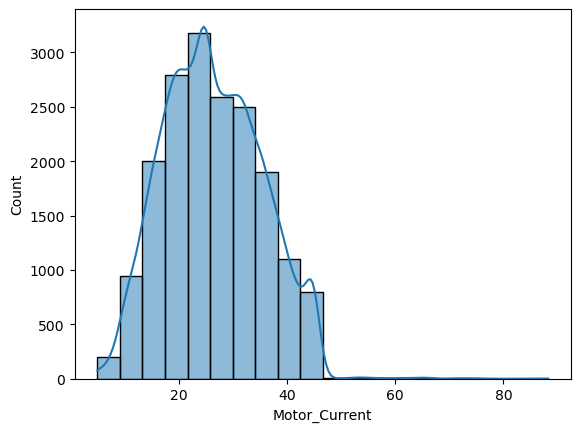

In [34]:
sns.histplot(df['Motor_Current'], bins=20, kde=True)
plt.show()

# ***Calculating motor-temperature***
## ***Physical Principles***
#### *Motor temperature increases with current draw and time, and cools towards ambient temperature when current is low.*
#### **1)** *Joule heating: Power loss is proportional to 'I*I*R', so heat generated increases with the square of current.*
#### **2)** *Cooling: Follows Newton’s Law of Cooling — temperature tends to return to ambient over time.*

In [35]:
## motor temp calculation 
import numpy as np

# Parameters
ambient_temp = 28  # degrees Celsius
k_heat = 0.00012   # heating constant (tune as needed)
k_cool = 0.001     # cooling constant (tune as needed)
delta_t = 5        # time step in seconds

# Initialize
motor_temp = [ambient_temp]

for i in range(1, len(calculated_features)):
    I = df.loc[i, 'Motor_Current']
    T_prev = motor_temp[-1]
    # Heat gain from current
    delta_T_gain = k_heat * (I ** 2) * delta_t
    # Cooling towards ambient
    delta_T_cool = -k_cool * (T_prev - ambient_temp) * delta_t
    # Update temperature
    T_new = T_prev + delta_T_gain + delta_T_cool
    # Optional: clip to realistic range
    T_new = np.clip(T_new, ambient_temp, 120)  # 120°C as a safety upper bound
    motor_temp.append(T_new)

calculated_features['Motor_Temp'] = motor_temp


C:\Users\hp\AppData\Local\Temp\ipykernel_8688\1551920392.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calculated_features['Motor_Temp'] = motor_temp


<Axes: xlabel='Motor_Temp', ylabel='Count'>

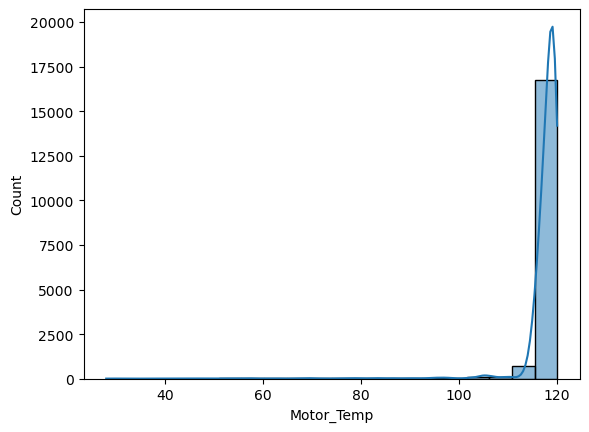

In [36]:
sns.histplot(calculated_features['Motor_Temp'],bins=20,kde=True)

### ***It is normal to have right skewed Feature for "Motor temperature" because the temperature will be within the designed operating temperature of the motor and at higher speed and load the temperature increases***

# ***Calculating battery-temperature***
## ***Physical Principles***
#### *Battery temperature rises due to internal heating from current flow (Joule heating) and returns toward ambient temperature over time via cooling.*
#### *1) Joule Heating: The primary source of battery heating is I²R loss, where heat generated is proportional to the square of the discharge current (I) and the battery’s internal resistance (R).*
#### *2) Cooling: The battery cools down towards the ambient temperature, following Newton’s Law of Cooling.*

<Axes: xlabel='Discharge_Current', ylabel='Count'>

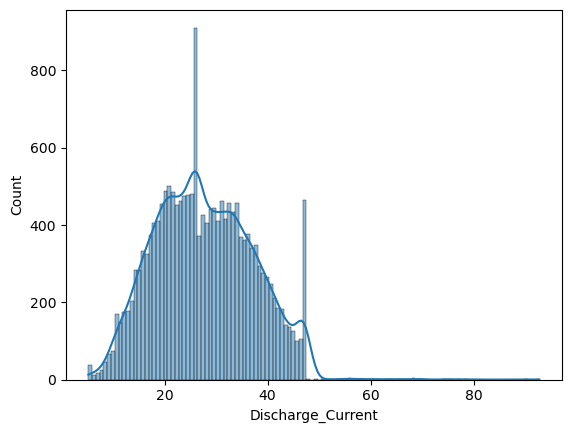

In [37]:
## Visualising Discharge_curent
sns.histplot(df["Discharge_Current"],bins=120,kde=True)

In [38]:
df["Discharge_Current"].value_counts()

Discharge_Current
26.250000    469
47.250000    405
10.500000     77
5.250000      24
16.388609      1
            ... 
40.232705      1
25.244695      1
38.995068      1
30.225035      1
39.925541      1
Name: count, Length: 17079, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1be66984380>,
 'caps': [<matplotlib.lines.Line2D at 0x1be669848c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be669840b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1be66984da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be66985010>],
 'means': []}

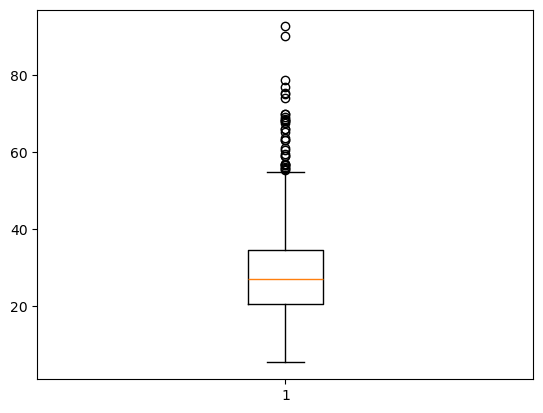

In [39]:
plt.boxplot(df['Discharge_Current'])

## *Handling Outliers for Discharge current Feature*

In [40]:
q1=df['Discharge_Current'].quantile(0.25).round(2)
q3=df['Discharge_Current'].quantile(0.75).round(2)
IQR= q3-q1
lower_fence = (q1 - 1.5* IQR).round(2)
upper_fence = (q3 + 1.5* IQR).round(2)

In [41]:
print(f"Outliers_count_Discharge_Current: {float(df['Discharge_Current'][ (df['Discharge_Current'] > upper_fence)].value_counts().sum())}")

Outliers_count_Discharge_Current: 34.0


## *Since all the outliers are higher than the upper bound value ,it can indicate the necessity of Sudden Throttle or increase of inclined angle.Since the outlier count is only 34(0.18%) so it is left for analysis purpose to determine the reason for spike*

In [42]:
import numpy as np

AMBIENT_TEMP = 28  # degrees Celsius
THERMAL_THRESHOLD=42
# Use a rolling mean of Discharge_Current to simulate accumulated heating
calculated_features['Battery_Temp'] = AMBIENT_TEMP + 0.15 * df['Discharge_Current'].rolling(10).mean().fillna(0)
calculated_features['Battery_Temp'] += np.random.normal(0, 0.3, len(df))  
calculated_features['Battery_Temp'] = calculated_features['Battery_Temp'].clip(AMBIENT_TEMP, THERMAL_THRESHOLD) 


C:\Users\hp\AppData\Local\Temp\ipykernel_8688\3564107080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calculated_features['Battery_Temp'] = AMBIENT_TEMP + 0.15 * df['Discharge_Current'].rolling(10).mean().fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_8688\3564107080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calculated_features['Battery_Temp'] += np.random.normal(0, 0.3, len(df))
C:\Users\hp\AppData\Local\Temp\ipykernel_8688\3564107080.py:8: SettingWithCopyWarning: 
A value is trying to

<Axes: xlabel='Battery_Temp', ylabel='Count'>

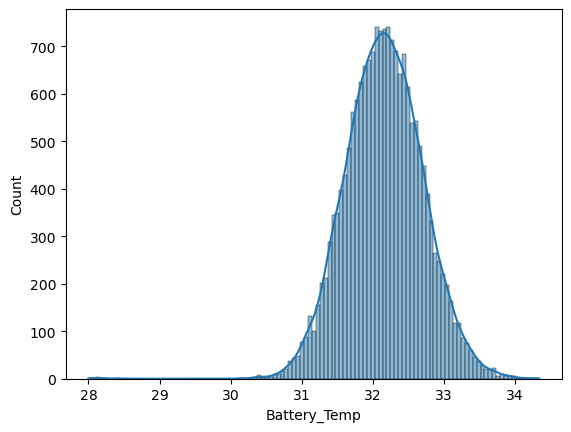

In [43]:
sns.histplot(calculated_features['Battery_Temp'],kde=True)

# *helper function to derive columns*

In [44]:
def outliers_viz(table,col):
    q1= table[col].quantile(0.25)
    q3= table[col].quantile(0.75)
    iqr= q3-q1
    lower_bound=q1-1.5*iqr.round(2)
    upper_bound=q3+1.5*iqr.round(2)
    table[col+ "_outliers"]= table[col][(table[col]<= lower_bound)| (table[col] >= upper_bound)]
    outliers_count = table[col + "_outliers"].count()
    sns.histplot(x=table[col],kde=True,element='bars')
    print(f"outliers_count_{col}: {outliers_count}\npercentage of outliers_count_{col}: {((outliers_count/len(table[col]))*100).round(3)}\nSkew_{col}: {table[col].skew().round(2)}")
    print(f"lower_bound: {lower_bound.round(2)},Upper_bound: {upper_bound.round(2)}")

C:\Users\hp\AppData\Local\Temp\ipykernel_8688\2590340462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[col+ "_outliers"]= table[col][(table[col]<= lower_bound)| (table[col] >= upper_bound)]


outliers_count_Battery_Temp: 142
percentage of outliers_count_Battery_Temp: 0.787
Skew_Battery_Temp: -0.12
lower_bound: 30.72,Upper_bound: 33.6


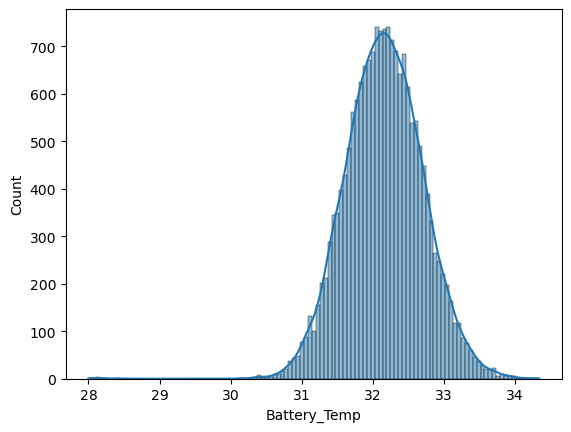

In [45]:
outliers_viz(calculated_features,"Battery_Temp")

# ***Calculating State of Charge (SOC)***
## *Physical Principles*
#### *State of Charge (SOC) is the percentage of remaining energy in a battery compared to its fully charged capacity. It is a key indicator of battery health and performance.*
#### *Before deriving lets check the dependant columns(Discharge_Current,Battery_Voltage) of the SOC*

outliers_count_Discharge_Current: 34
percentage of outliers_count_Discharge_Current: 0.188
Skew_Discharge_Current: 0.27
lower_bound: -0.36,Upper_bound: 55.41


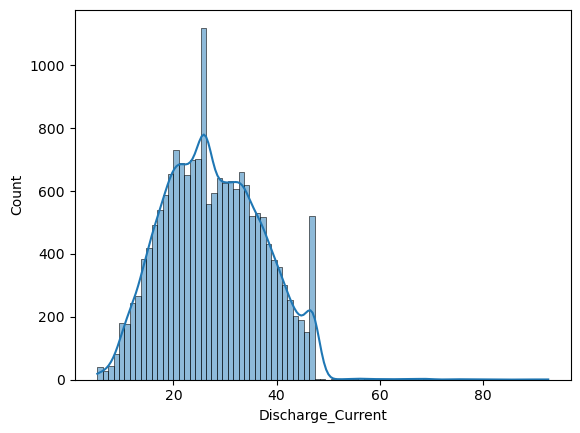

In [46]:
outliers_viz(df,"Discharge_Current")

outliers_count_Battery_Voltage: 31
percentage of outliers_count_Battery_Voltage: 0.172
Skew_Battery_Voltage: -0.23
lower_bound: 57.11,Upper_bound: 58.83


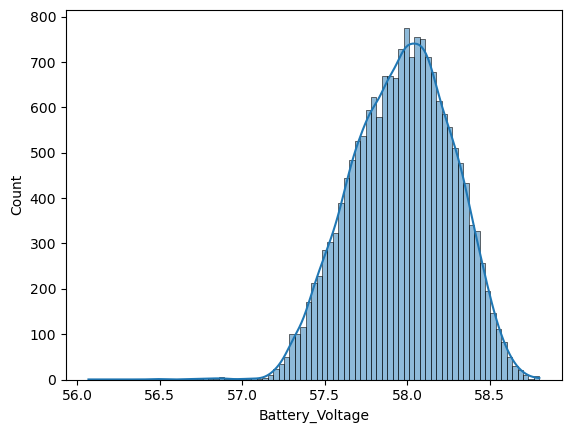

In [47]:
outliers_viz(df,"Battery_Voltage")

In [48]:
calculated_features['Battery_Voltage_clipped']=df["Battery_Voltage"].clip( 57.11,58.83)

C:\Users\hp\AppData\Local\Temp\ipykernel_8688\1216390332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calculated_features['Battery_Voltage_clipped']=df["Battery_Voltage"].clip( 57.11,58.83)


C:\Users\hp\AppData\Local\Temp\ipykernel_8688\2590340462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[col+ "_outliers"]= table[col][(table[col]<= lower_bound)| (table[col] >= upper_bound)]


outliers_count_Battery_Voltage_clipped: 0
percentage of outliers_count_Battery_Voltage_clipped: 0.0
Skew_Battery_Voltage_clipped: -0.15
lower_bound: 57.11,Upper_bound: 58.83


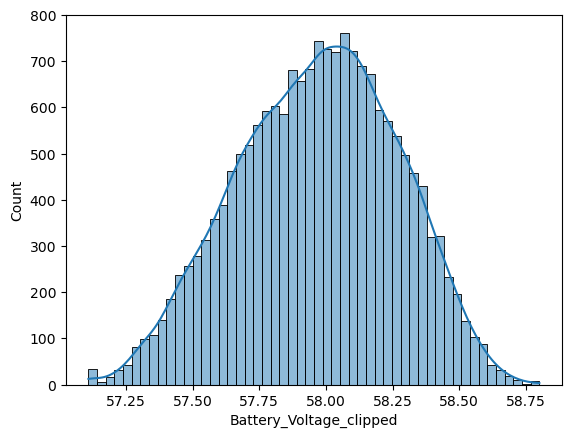

In [49]:
outliers_viz(calculated_features,"Battery_Voltage_clipped")
## can be used if in case needed

In [50]:
soc_derived=pd.DataFrame()

In [51]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18050 entries, 1 to 18050
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   18050 non-null  datetime64[ns]
 1   Ride_Mode                   18050 non-null  object        
 2   Front_PSI                   18050 non-null  float64       
 3   Rear_PSI                    18050 non-null  float64       
 4   Motor_Current               18050 non-null  float64       
 5   Motor_Temp                  18050 non-null  float64       
 6   Discharge_Current           18050 non-null  float64       
 7   Battery_Voltage             18050 non-null  float64       
 8   Voltage_Difference          18050 non-null  float64       
 9   Battery_Impedance           18050 non-null  float64       
 10  Battery_Temp                18050 non-null  float64       
 11  SOC                         18050 non-null  float64   

In [68]:
%who DataFrame

calculated_features	 df	 null_cols	 outlier_columns	 soc_dep	 


In [120]:
soc_derived=pd.DataFrame(columns=['Discharge_Current','Battery_Voltage'],index=[i for i in range(1,len(soc_derived))] )

In [121]:
%who DataFrame

calculated_features	 df	 null_cols	 outlier_columns	 soc_dep	 soc_derived	 


In [122]:
soc_derived


,Discharge_Current,Battery_Voltage


In [123]:
soc_derived[["Discharge_Current",'Battery_Voltage']]=df[['Discharge_Current',"Battery_Voltage"]]

In [124]:
soc_derived

,Discharge_Current,Battery_Voltage
1,27.754599,57.788324
2,26.250000,57.956127
3,16.919610,58.308272
4,31.903262,57.536257
5,35.269278,57.623037
...,...,...
18046,29.344527,57.852065
18047,20.019034,58.443100
18048,30.072822,57.798098
18049,34.598983,57.825481


outliers_count_Discharge_Current: 34
percentage of outliers_count_Discharge_Current: 0.188
Skew_Discharge_Current: 0.27
lower_bound: -0.36,Upper_bound: 55.41


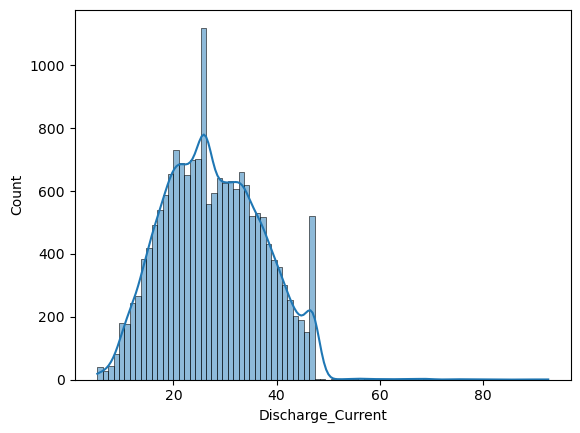

In [126]:
outliers_viz(soc_derived,"Discharge_Current")

outliers_count_Battery_Voltage: 31
percentage of outliers_count_Battery_Voltage: 0.172
Skew_Battery_Voltage: -0.23
lower_bound: 57.11,Upper_bound: 58.83


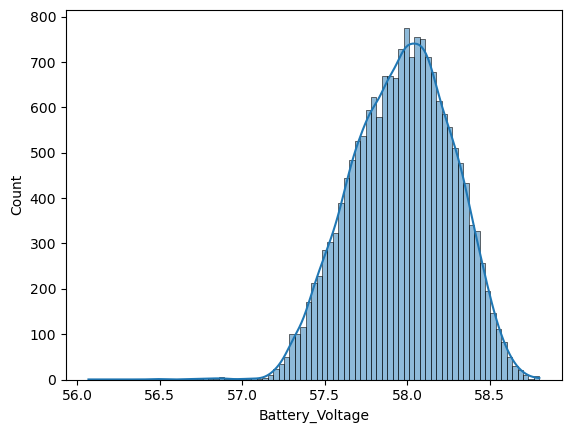

In [127]:
outliers_viz(soc_derived,"Battery_Voltage")

## ***SOC Calculation Using Discharge Current and Battery Voltage***

outliers_count_Discharge_Current_Used: 34
percentage of outliers_count_Discharge_Current_Used: 0.188
Skew_Discharge_Current_Used: 0.27
lower_bound: -0.36,Upper_bound: 55.41


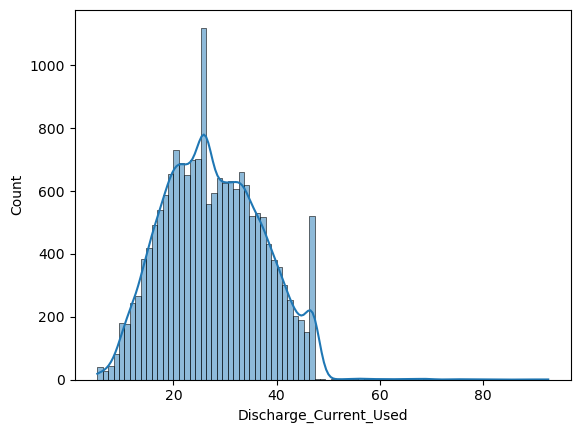

In [132]:
# Constants
INITIAL_SOC = 95  # percent
BATTERY_CAPACITY_WH = 2900  # watt-hours (2.9 kWh)
# Time delta: assume 5 seconds per sample (adjust if your data is different)
TIME_DELTA_HOURS = 5 / 3600  # 5 seconds in hours

# Clip or filter out negative discharge current (regen)
soc_derived['Discharge_Current_Used'] = soc_derived['Discharge_Current'].clip(lower=0)
outliers_viz(soc_derived,"Discharge_Current_Used")

outliers_count_Energy_Removed_Wh: 32
percentage of outliers_count_Energy_Removed_Wh: 0.177
Skew_Energy_Removed_Wh: 0.24
lower_bound: -0.0,Upper_bound: 4.43


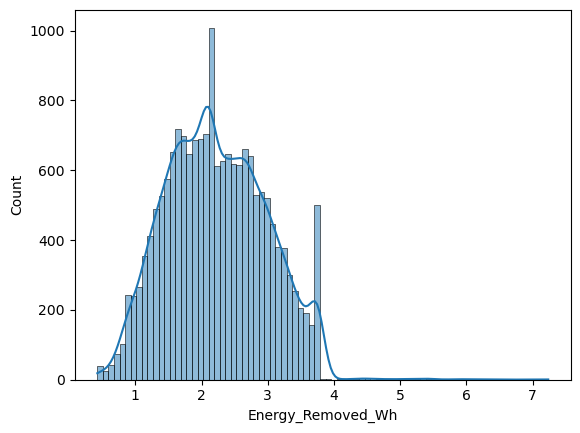

In [133]:
soc_derived['Energy_Removed_Wh'] = (
    soc_derived['Discharge_Current_Used'] * soc_derived['Battery_Voltage'] * TIME_DELTA_HOURS )
outliers_viz(soc_derived,"Energy_Removed_Wh")

outliers_count_Cumulative_Energy_Removed_Wh: 0
percentage of outliers_count_Cumulative_Energy_Removed_Wh: 0.0
Skew_Cumulative_Energy_Removed_Wh: -0.0
lower_bound: -20156.58,Upper_bound: 60485.82


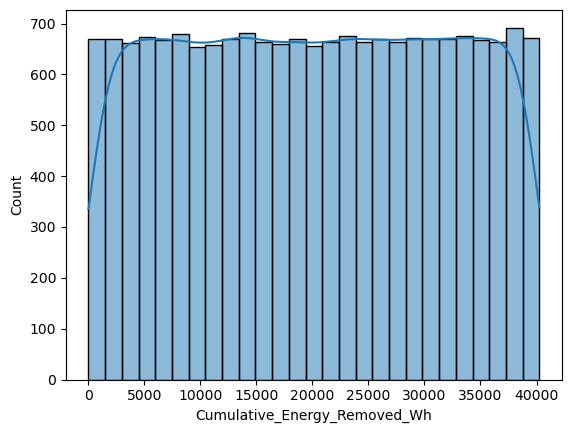

In [135]:
soc_derived['Cumulative_Energy_Removed_Wh'] = soc_derived['Energy_Removed_Wh'].cumsum()
outliers_viz(soc_derived,"Cumulative_Energy_Removed_Wh")

In [139]:
soc_derived

,Discharge_Current,Battery_Voltage,Discharge_Current_outliers,Battery_Voltage_outliers,Discharge_Current_Used,Energy_Removed_Wh,Discharge_Current_Used_outliers,Energy_Removed_Wh_outliers,Cumulative_Energy_Removed_Wh,Cumulative_Energy_Removed_Wh_outliers,SOC,SOC_outliers,Ride_ID
1,27.754599,57.788324,NaN,NaN,27.754599,2.227627,NaN,NaN,2.227627,NaN,94.732568,94.884107,0
2,26.250000,57.956127,NaN,NaN,26.250000,2.112984,NaN,NaN,4.340611,NaN,94.833602,94.132200,0
3,16.919610,58.308272,NaN,NaN,16.919610,1.370213,NaN,NaN,5.710824,NaN,94.527721,94.792648,0
4,31.903262,57.536257,NaN,NaN,31.903262,2.549436,NaN,NaN,8.260261,NaN,94.713012,94.774873,0
5,35.269278,57.623037,NaN,NaN,35.269278,2.822671,NaN,NaN,11.082931,NaN,94.536953,94.801546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18046,29.344527,57.852065,NaN,NaN,29.344527,2.357835,NaN,NaN,40245.208591,NaN,91.469971,20.000000,10
18047,20.019034,58.443100,NaN,NaN,20.019034,1.624964,NaN,NaN,40246.833555,NaN,91.506107,20.000000,10
18048,30.072822,57.798098,NaN,NaN,30.072822,2.414100,NaN,NaN,40249.247655,NaN,91.435676,20.000000,10
18049,34.598983,57.825481,NaN,NaN,34.598983,2.778754,NaN,NaN,40252.026409,NaN,90.950125,20.000000,10


In [138]:
# Identify ride start points (e.g., every 1800 samples or by timestamp gap)
ride_length = 1800  # number of samples per ride
soc_derived['Ride_ID'] = (np.arange(len(soc_derived)) // ride_length).astype(int)

# Calculate SOC per ride
soc_derived['SOC'] = np.nan
for ride_id in soc_derived['Ride_ID'].unique():
    idx = soc_derived['Ride_ID'] == ride_id
    cumulative_energy = soc_derived.loc[idx, 'Energy_Removed_Wh'].cumsum()
    soc = INITIAL_SOC - (cumulative_energy / BATTERY_CAPACITY_WH * 100)
    soc += np.random.normal(0, 0.2, soc.shape[0])
    soc = soc.clip(20, 95)
    soc_derived.loc[idx, 'SOC'] = soc.values


outliers_count_SOC: 18050
percentage of outliers_count_SOC: 100.0
Skew_SOC: 5.3
lower_bound: 20.0,Upper_bound: 20.0


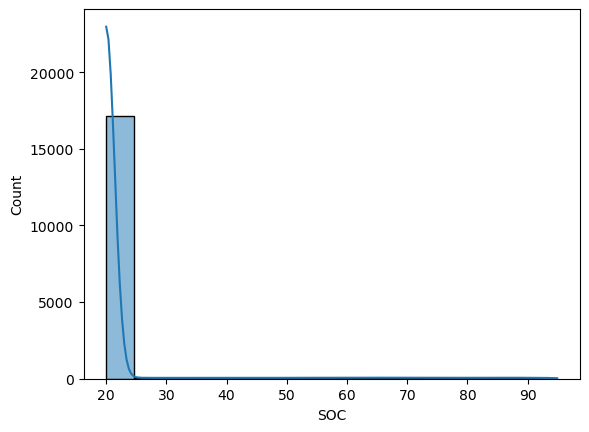

In [137]:
# BATTERY_CAPACITY_WH = 2900 
soc_derived['SOC'] = INITIAL_SOC - (soc_derived['Cumulative_Energy_Removed_Wh'] / BATTERY_CAPACITY_WH * 100)
# Add a small noise for realism
soc_derived['SOC'] += np.random.normal(0, 0.2, len(soc_derived))
# Clip to realistic SOC range (e.g., 20 to 95)
soc_derived['SOC'] = soc_derived['SOC'].clip(20, 95)
outliers_viz(soc_derived,"SOC")

outliers_count_SOC: 0
percentage of outliers_count_SOC: 0.0
Skew_SOC: 0.81
lower_bound: -40.9,Upper_bound: 121.5


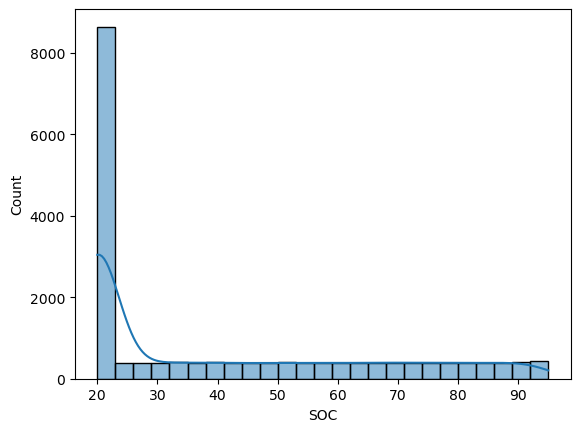

In [140]:
outliers_viz(soc_derived,"SOC")

In [144]:

df["SOC"] = soc_derived["SOC"]

outliers_count_SOC: 0
percentage of outliers_count_SOC: 0.0
Skew_SOC: 0.81
lower_bound: -40.9,Upper_bound: 121.5


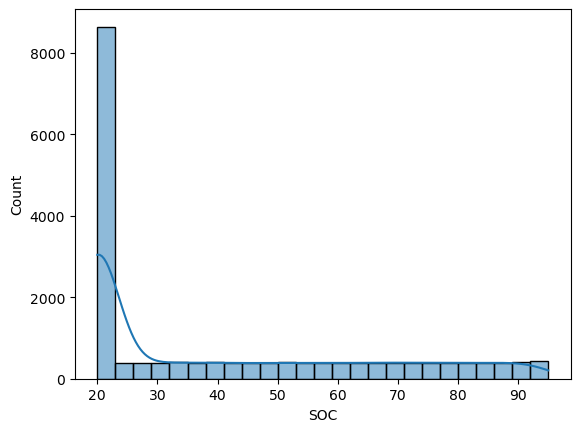

In [146]:
outliers_viz(df,"SOC")

## ***Acceleration  Calculation***

outliers_count_Speed: 3
percentage of outliers_count_Speed: 0.017
Skew_Speed: -0.15
lower_bound: 11.52,Upper_bound: 106.04


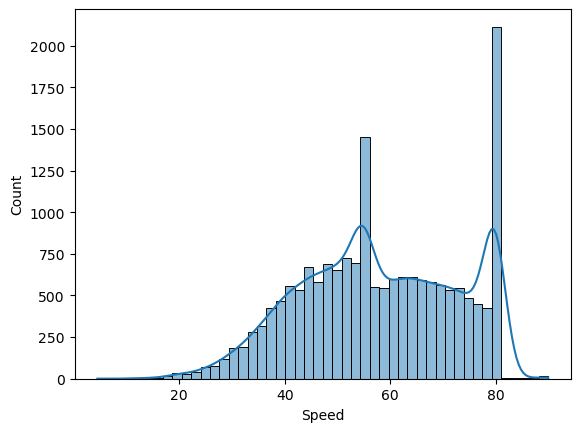

In [151]:
outliers_viz(df,"Speed")

In [168]:

acc_cal=pd.DataFrame(columns=["Speed","Acceleration"],index=[i for i in range(1,len(df)+1)] )


In [169]:
# --- Speed Profile with Realistic Start ---

# Parameters
segment_length = int((30 * 60) / 5)  # 30 minutes, 5s interval = 360 samples per segment
target_speed_smart = 45  # km/h for Smart Eco
target_speed_zip = 65    # km/h for Zip
accel_time = 60          # seconds to reach target speed (adjust as needed)
accel_steps = int(accel_time / 5)  # number of steps to reach target

speeds = []
i = 0
while i < len(df):
    # Determine ride mode for this segment
    ride_mode = df['Ride_Mode'].iloc[i]
    if ride_mode == 'Smart Eco':
        target_speed = np.random.normal(target_speed_smart, 2)
    else:
        target_speed = np.random.normal(target_speed_zip, 3)
    # Optionally, adjust for tyre pressure and discharge current
    avg_psi = (df['Front_PSI'].iloc[i:i+segment_length].mean() + df['Rear_PSI'].iloc[i:i+segment_length].mean()) / 2
    psi_factor = 1.0 if avg_psi > 30 else 0.95  # Lower pressure reduces max speed
    discharge_factor = 1.0 if df['Discharge_Current'].iloc[i:i+segment_length].mean() < 30 else 0.97

    target_speed = target_speed * psi_factor * discharge_factor

    # Ramp up from 0 to target speed
    ramp = np.linspace(0, target_speed, accel_steps)
    # Stay near target speed with some noise
    cruise = np.random.normal(target_speed, 2, segment_length - accel_steps)
    segment_speed = np.concatenate([ramp, cruise])
    segment_speed = np.clip(segment_speed, 0, 90)  # Physical max

    # Add to list
    speeds.extend(segment_speed[:segment_length])
    i += segment_length

# If speeds is longer than df, trim; if shorter, pad
speeds = speeds[:len(df)]
if len(speeds) < len(df):
    speeds += [speeds[-1]] * (len(df) - len(speeds))

acc_cal['Speed'] = speeds


outliers_count_Speed: 229
percentage of outliers_count_Speed: 1.269
Skew_Speed: -1.6
lower_bound: 20.13,Upper_bound: 88.01


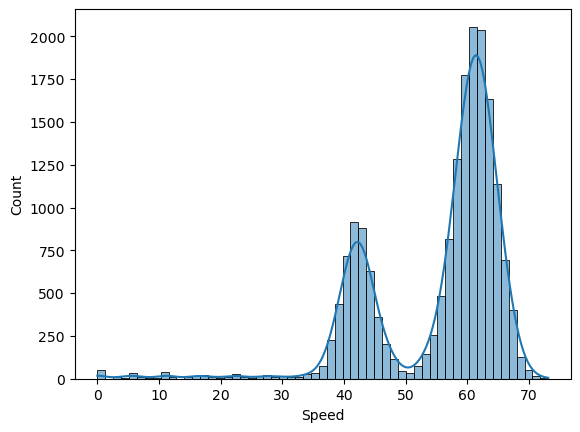

In [172]:
outliers_viz(acc_cal,"Speed")

In [173]:
df["Speed"]=acc_cal["Speed"]

outliers_count_Speed: 229
percentage of outliers_count_Speed: 1.269
Skew_Speed: -1.6
lower_bound: 20.13,Upper_bound: 88.01


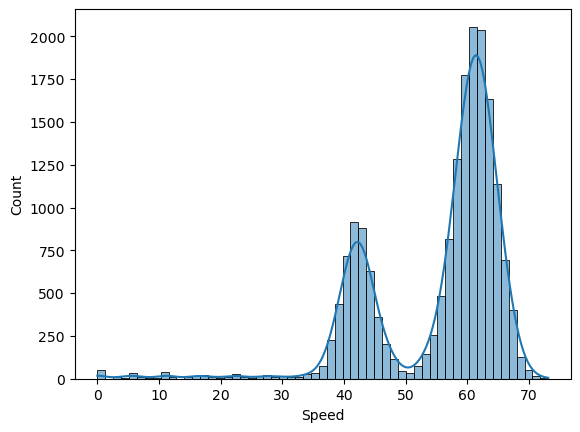

In [174]:
outliers_viz(df,"Speed")

In [175]:
# Convert speed from km/h to m/s
acc_cal['Speed_mps'] = acc_cal['Speed'] * 0.27778

# Calculate acceleration (m/s²)
# Δt = 5 seconds (sampling interval)
acc_cal['Acceleration'] = acc_cal['Speed_mps'].diff() / 5

# Clip to physical limits (e.g., -3 to +3 m/s² for a scooter)
acc_cal['Acceleration'] = acc_cal['Acceleration'].clip(-3, 3)


outliers_count_Acceleration: 162
percentage of outliers_count_Acceleration: 0.898
Skew_Acceleration: -6.0
lower_bound: -0.43,Upper_bound: 0.45


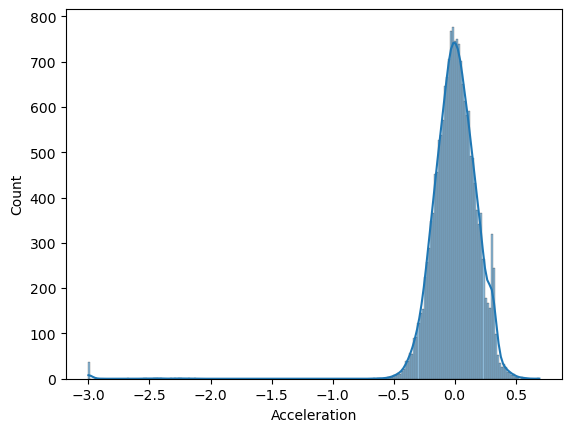

In [176]:
outliers_viz(acc_cal,"Acceleration")

In [177]:
df["Acceleration"]= acc_cal["Acceleration"]

In [178]:
df

,Timestamp,Ride_Mode,Front_PSI,Rear_PSI,Motor_Current,Motor_Temp,Discharge_Current,Battery_Voltage,Voltage_Difference,Battery_Impedance,...,SOC,Speed,Regen_Triggered,Regen_Current,Acceleration,Incline_Angle,Discharge_Current_outliers,Battery_Voltage_outliers,SOC_outliers,Speed_outliers
1,2025-01-01 00:00:00,Zip,22.133395,35.902564,26.432951,28.445774,27.754599,57.788324,9.595966,85.432865,...,94.732568,0.000000,False,0.0,NaN,0.431881,NaN,NaN,NaN,0.000000
2,2025-01-01 00:00:05,Smart Eco,22.061009,35.959559,25.000000,28.510015,26.250000,57.956127,14.467916,85.905841,...,94.833602,5.478767,True,-15.0,0.304378,-0.449068,NaN,NaN,NaN,5.478767
3,2025-01-01 00:00:10,Smart Eco,22.153538,35.886316,16.113914,28.300610,16.919610,58.308272,18.920789,85.323649,...,94.527721,10.957533,False,0.0,0.304378,0.317115,NaN,NaN,NaN,10.957533
4,2025-01-01 00:00:15,Zip,22.183009,36.095582,30.384059,28.320259,31.903262,57.536257,12.000000,85.184668,...,94.713012,16.436300,False,0.0,0.304378,-0.509013,NaN,NaN,NaN,16.436300
5,2025-01-01 00:00:20,Zip,22.133961,35.855153,33.589789,28.178581,35.269278,57.623037,15.284090,85.000000,...,94.536953,21.915067,False,0.0,0.304378,-0.321698,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18046,2025-01-25 18:29:40,Zip,22.162308,35.643349,27.947168,85.000000,29.344527,57.852065,10.481460,85.402396,...,91.469971,61.631193,True,-15.0,0.131936,-0.588729,NaN,NaN,NaN,NaN
18047,2025-01-25 18:29:45,Smart Eco,22.120815,35.968486,19.065747,85.000000,20.019034,58.443100,16.571230,85.329815,...,91.506107,60.353613,False,0.0,-0.070977,-0.688799,NaN,NaN,NaN,NaN
18048,2025-01-25 18:29:50,Zip,22.259283,35.780564,28.640782,85.000000,30.072822,57.798098,10.530152,85.590026,...,91.435676,62.084103,False,0.0,0.096139,0.553461,NaN,NaN,NaN,NaN
18049,2025-01-25 18:29:55,Zip,22.068601,35.835177,32.951412,85.000000,34.598983,57.825481,9.968742,85.655654,...,90.950125,61.387387,False,0.0,-0.038707,-0.240892,NaN,NaN,NaN,NaN


In [179]:
df.columns

Index(['Timestamp', 'Ride_Mode', 'Front_PSI', 'Rear_PSI', 'Motor_Current',
       'Motor_Temp', 'Discharge_Current', 'Battery_Voltage',
       'Voltage_Difference', 'Battery_Impedance', 'Battery_Temp', 'SOC',
       'Speed', 'Regen_Triggered', 'Regen_Current', 'Acceleration',
       'Incline_Angle', 'Discharge_Current_outliers',
       'Battery_Voltage_outliers', 'SOC_outliers', 'Speed_outliers'],
      dtype='object')

In [180]:
df.drop(columns=['Discharge_Current_outliers',
       'Battery_Voltage_outliers', 'SOC_outliers', 'Speed_outliers'],inplace=True)

In [181]:
df.columns

Index(['Timestamp', 'Ride_Mode', 'Front_PSI', 'Rear_PSI', 'Motor_Current',
       'Motor_Temp', 'Discharge_Current', 'Battery_Voltage',
       'Voltage_Difference', 'Battery_Impedance', 'Battery_Temp', 'SOC',
       'Speed', 'Regen_Triggered', 'Regen_Current', 'Acceleration',
       'Incline_Angle'],
      dtype='object')

In [185]:
df.shape

(18050, 17)

In [ ]:
df.to_csv("AtherRizta_Cleaned_datset.csv")

In [2]:
import pandas as pd
import seaborn as sns

In [5]:
cleaned_df= pd.read_csv("AtherRizta_Cleaned_dataset.xls",index_col=0)

In [6]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18050 entries, 1 to 18050
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           18050 non-null  object 
 1   Ride_Mode           18050 non-null  object 
 2   Front_PSI           18050 non-null  float64
 3   Rear_PSI            18050 non-null  float64
 4   Motor_Current       18050 non-null  float64
 5   Motor_Temp          18050 non-null  float64
 6   Discharge_Current   18050 non-null  float64
 7   Battery_Voltage     18050 non-null  float64
 8   Voltage_Difference  18050 non-null  float64
 9   Battery_Impedance   18050 non-null  float64
 10  Battery_Temp        18050 non-null  float64
 11  SOC                 18050 non-null  float64
 12  Speed               18050 non-null  float64
 13  Regen_Triggered     18050 non-null  bool   
 14  Regen_Current       18050 non-null  float64
 15  Acceleration        18049 non-null  float64
 16  Incline_A

In [8]:
cleaned_df["Timestamp"]= pd.to_datetime(cleaned_df["Timestamp"],errors='coerce')

In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18050 entries, 1 to 18050
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           18050 non-null  datetime64[ns]
 1   Ride_Mode           18050 non-null  object        
 2   Front_PSI           18050 non-null  float64       
 3   Rear_PSI            18050 non-null  float64       
 4   Motor_Current       18050 non-null  float64       
 5   Motor_Temp          18050 non-null  float64       
 6   Discharge_Current   18050 non-null  float64       
 7   Battery_Voltage     18050 non-null  float64       
 8   Voltage_Difference  18050 non-null  float64       
 9   Battery_Impedance   18050 non-null  float64       
 10  Battery_Temp        18050 non-null  float64       
 11  SOC                 18050 non-null  float64       
 12  Speed               18050 non-null  float64       
 13  Regen_Triggered     18050 non-null  bool          


In [10]:
cleaned_df.describe()

,Timestamp,Front_PSI,Rear_PSI,Motor_Current,Motor_Temp,Discharge_Current,Battery_Voltage,Voltage_Difference,Battery_Impedance,Battery_Temp,SOC,Speed,Regen_Current,Acceleration,Incline_Angle
count,18050,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18050.000000,18049.000000,18050.000000
mean,2025-01-13 09:15:00,21.506625,35.102381,26.425201,78.864377,27.746461,57.967716,11.998453,85.574320,32.158994,40.411527,55.411501,-6.140495,0.001037,-0.000116
min,2025-01-01 00:00:00,20.611074,33.802697,5.000000,28.000000,5.250000,56.069150,5.000000,85.000000,28.000000,20.000000,0.000000,-15.000000,-3.000000,-2.103964
25%,2025-01-07 00:15:01.249999872,21.200270,34.653417,19.575618,85.000000,20.554399,57.754652,9.995945,85.112330,31.801976,20.000000,45.582599,-15.000000,-0.101230,-0.341785
50%,2025-01-13 09:15:00,21.510005,35.100000,25.654315,85.000000,26.937031,57.982424,12.000000,85.508888,32.152438,25.906057,59.720782,0.000000,0.006543,-0.000138
75%,2025-01-19 18:14:58.750000128,21.813262,35.549987,32.855374,85.000000,34.498142,58.187272,13.954112,85.919099,32.518705,60.602315,62.553794,0.000000,0.117380,0.330951
max,2025-01-25 18:30:00,22.391233,36.419604,88.282671,85.000000,92.696805,58.800000,20.000000,87.659466,34.321075,95.000000,73.134183,0.000000,0.693609,4.107934
std,NaN,0.363562,0.539984,9.026408,13.980481,9.477728,0.301149,2.937911,0.494030,0.534875,24.651378,10.652170,7.373805,0.220696,0.510485


<Axes: xlabel='Motor_Current', ylabel='Count'>

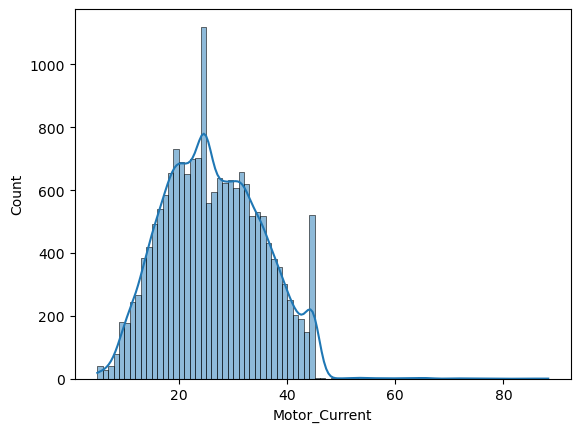

In [18]:
sns.histplot(cleaned_df["Motor_Current"],kde=True,bins='auto')

In [23]:
import matplotlib.pyplot as plt

In [34]:
import matplotlib.pyplot as plt

def box_plots(table):
    # Loop only over numeric columns
    for col in table.select_dtypes(include='number').columns:
        plt.figure(figsize=(4, 5))
        plt.boxplot(table[col].dropna(), vert=True)
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.grid(True)
        plt.show()


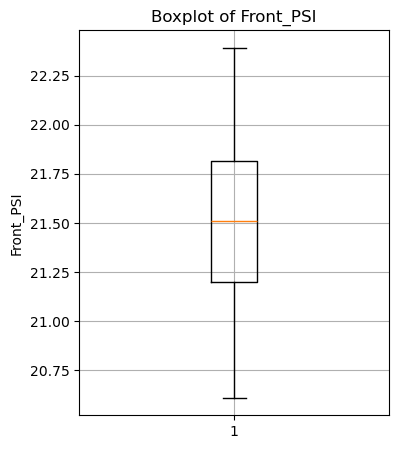

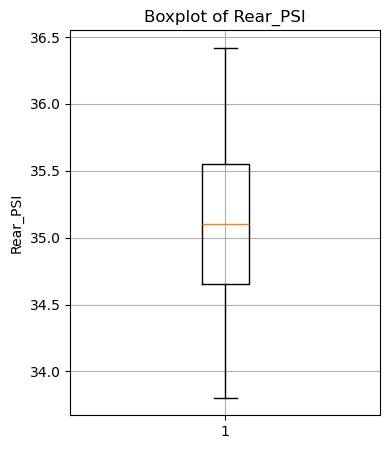

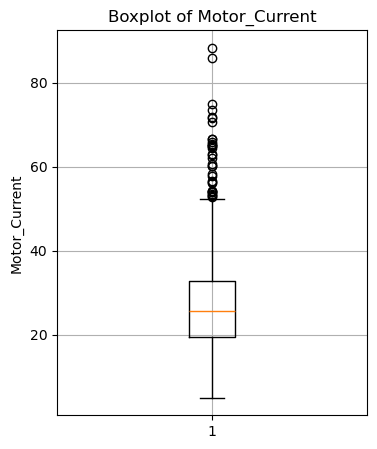

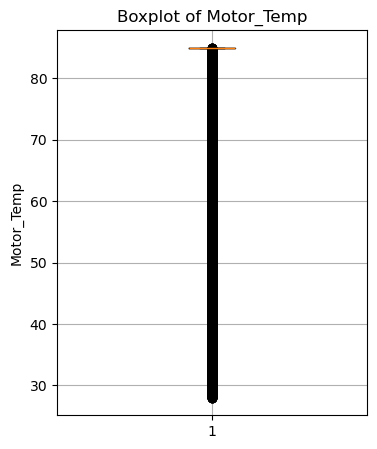

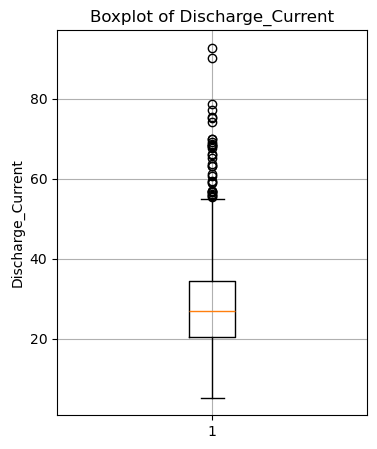

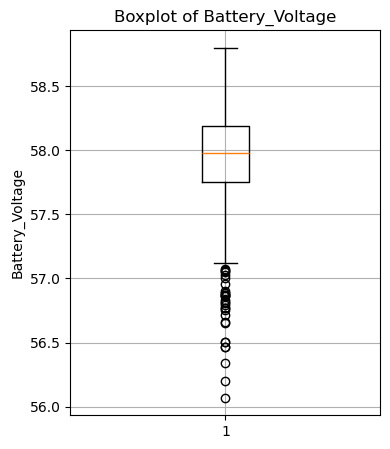

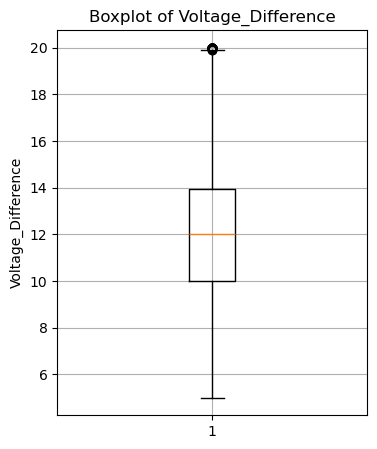

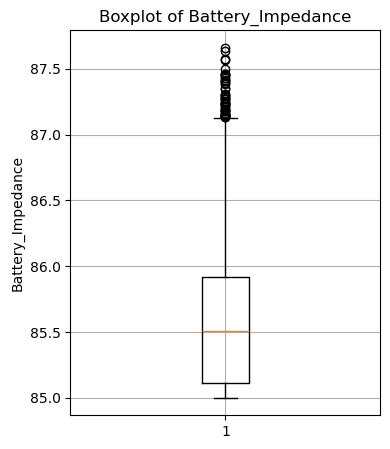

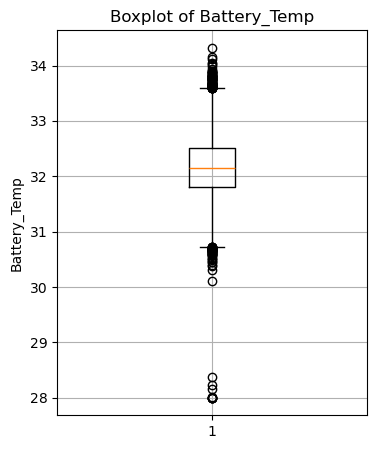

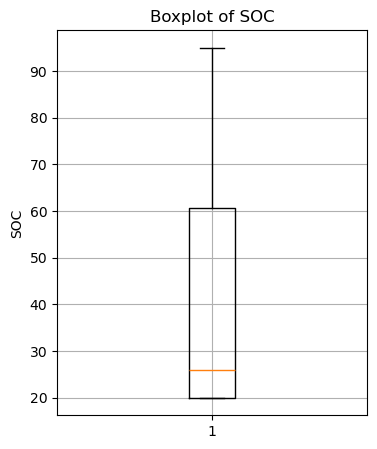

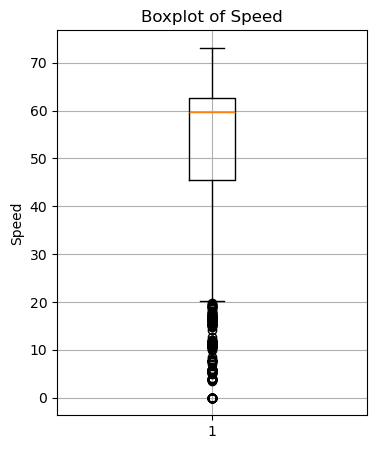

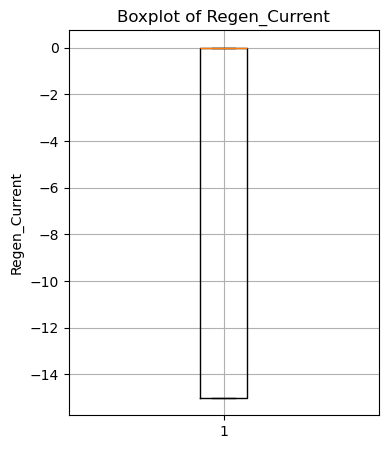

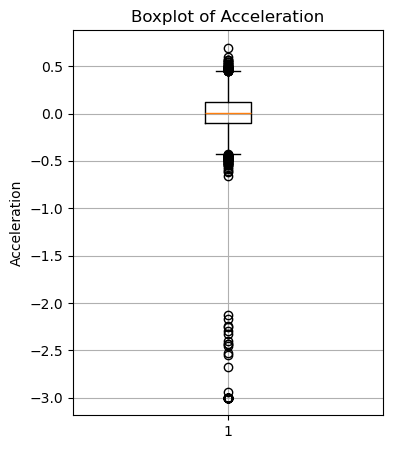

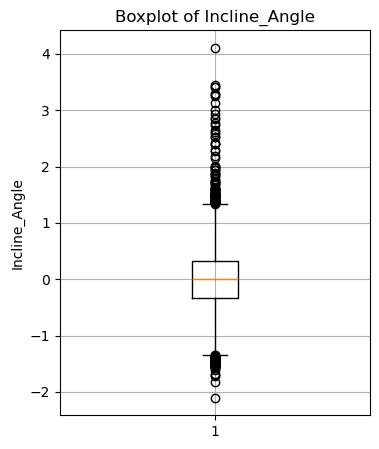

In [35]:
box_plots(cleaned_df)

In [42]:
cleaned_df.to_csv("AtherRizta_Cleaned_datset.csv",index=False)

In [44]:
df=pd.read_csv("AtherRizta_Cleaned_datset.csv")